# Setting up Paths

In [1]:
#path to the data
pathCOMPASOutput = '/home/cneijssel/Documents/Projects/Data/CosmicInt/'
#path to compasrepo which contains ther popsynth folder
pathRepo = '/home/cneijssel/Documents/COMPASpop'


# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import os
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append(pathRepo + '/popsynth/Papers/NeijsselEtAL/CosmicIntegration/Scripts')


# Custom Imports from COMPASrepo

In [3]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV
import ClassBayes             as CL  #Used to create KDECOMPAS/Posterior/Likelyhood 
import ClassEvents            as CE  #Where I store the GW-events observed


# General Idea

The main results of this study assume values for the solar metallicity mass fraction and the solar oxygen to hydrogen number density. Although are stellar models do not depend on this assumption, the translation between our models and the MSSFR distributions do.
Here I assume one MSSFR variation and then do a two dimensional study in the aforementioned parameters to estimate the effect on the observed rate for O1.

In [4]:
resolution  = 12
logOH12suns = np.linspace(8.69, 9.1, resolution)
solars      = np.linspace(0.0127, 0.02, resolution)
#every row a redshift, every column a system
#observed2D    = cosmic.PerSystemRedshift_ratesObserved

results = np.zeros(shape=(len(logOH12suns), len(solars)))


In [5]:
#The general cosmic integrator

Data      = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
            minRedshift=0,   maxRedshift=1, nrRedshiftBins=25, optimistic=False)
#MSSFR
Data.MSSFR.Zprescription         = 'MZ_GSMF'
Data.MSSFR.SFRprescription       = 'Madau et al. (2014)'
Data.MSSFR.ZMprescription        = 'Ma et al. (2015)'
Data.MSSFR.GSMFprescription      = 'Furlong et al. (2015) Double'

Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()


In [6]:
RedoCalculation    =  True
if RedoCalculation == True:
    for nrOH12, logOH12sun in enumerate(logOH12suns):
        print nrOH12, len(logOH12suns)
        for nrs, solar in enumerate(solars):
            print '     ', nrs, len(solars)
            Data.MSSFR.logOH12sun            = logOH12sun        #fraction number density solar
            Data.MSSFR.solarMetallicity      = solar  #fraction mass in metals solar
            Data.cosmologicalIntegration()

            RateObserved        = np.sum(Data.PerSystemPerRedshift_ratesObserved)
            results[nrOH12][nrs] = RateObserved
    np.savetxt('solarValuesV.txt', results)

0 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
1 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
2 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
3 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
4 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
5 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
6 12
      0 12
      1 12
      2 12
      3 12
      4 12
      5 12
      6 12
      7 12
      8 12
      9 12
      10 12
      11 12
7 12
      0 12
      1 12


91.8910385164
80.7369227433 287.934454705


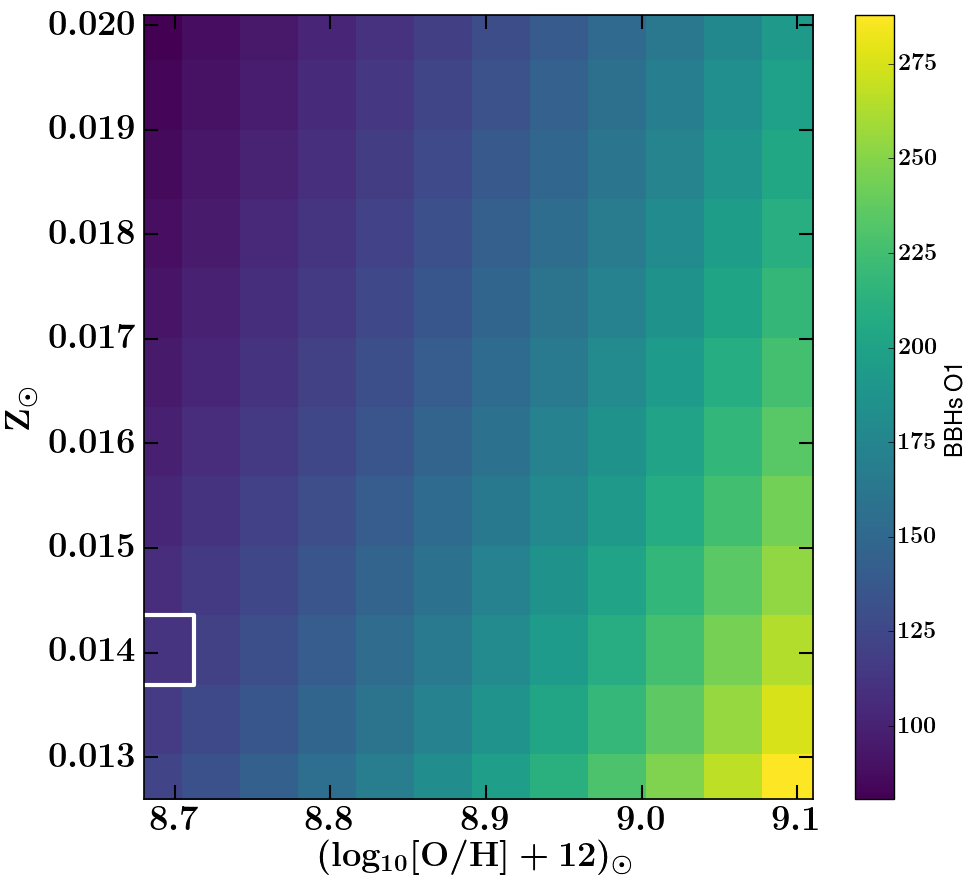

In [7]:

fig, axes = plt.subplots(1,1, figsize=(10,9))

array = np.genfromtxt('./solarValuesV.txt')
for nrOH12, logOH12sun in enumerate(logOH12suns):
    for nrs, solar in enumerate(solars):
        sc = axes.scatter(logOH12sun, solar, c=array[nrOH12][nrs],\
                          vmin=np.min(array), vmax=np.max(array), cmap='viridis',\
                         lw=0., s=2500, marker='s')
axes.scatter(logOH12suns[0], solars[2], c=array[0][2],\
                          vmin=np.min(array), vmax=np.max(array), cmap='viridis',\
                         lw=3., s=2500, marker='s', edgecolor='w')        
print array[0][7]
cbar = fig.colorbar(sc)
cbar.set_label(label='BBHs O1', fontsize=17)
cbar.ax.tick_params(labelsize=17) 
namesX = r'$ \rm (log_{10}[O/H]+12)_{\odot}$'
namesY = r'$\rm Z_{\odot}$'
axes = CV.layoutAxes(axes, namesX, namesY)
axes.set_xlim(8.68, 9.11)
axes.set_ylim(0.0126, 0.0201)
print np.min(array), np.max(array)

plt.tight_layout()
plt.savefig('./solarValuesV.png')
plt.show()